## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

# You answer here
On Observing at problem, It is stated that 5 % of natin's children has autism. Some claimed that it is due to certain 
chemicals in environment. We can choose 5 % as 0.05 significance level in our hypothesis testing.
We choose 0.05 as null hypothesis and 0.95 as alternate hypothesis.
Then we conduct test and get p value. By comparing p value we decide to reject or not the null hypothesis.
1) find level of significance
2) conduct Hypothesis
3) find p value
4) determing wether to reject null hypothesis or not based on p value and significance level.


In [3]:
# your code here
import math
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sts
import krippendorff

In [4]:
N = 384
n = 46
s = 0.05
z = ((n/N)-s)/math.sqrt((s*(1-s))/N) # Z score calculation
print('Total Examined:',N)
print('Positive :',n)
print('Significance Level:',s)
print('#####################')
print('Z-Score:',round(z,2))
p_value = 1-int((scipy.stats.t.cdf(z, df=N-1))*1000)/1000 # calculating p value from zscore
print('#####################')
print('P-Value:',int((p_value)*1000)/1000)

if p_value < 0.05:
    print("Here the pvalue is less than 0.05 so we reject null hypothesis.")
else:
    print("Here the pvalue is less than 0.05 so we do not reject null hypothesis.")

Total Examined: 384
Positive : 46
Significance Level: 0.05
#####################
Z-Score: 6.28
#####################
P-Value: 0.001
Here the pvalue is less than 0.05 so we reject null hypothesis.


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

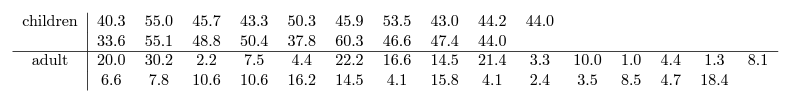

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [5]:
# You answer here

children=[40.3,55.0,45.7,43.3,50.3,45.9,53.5,43.0,44.2,44.0,33.6,55.1,48.8,50.4,37.8,60.3,46.6,47.4,44.0]
adult=[20.0,30.2,2.2,7.5,4.4,22.2,16.6,14.5,21.4,3.3,10.0,1.0,4.4,1.3,8.1,6.6,7.8,10.6,10.6,16.2,14.5,4.1,15.8,4.1,2.4,3.5,8.5,4.7,18.4]
df_c=pd.DataFrame(children,columns=['children'])
df_a=pd.DataFrame(adult,columns=['adult'])

In [6]:
df_a.head(10)

,adult
0,20.0
1,30.2
2,2.2
3,7.5
4,4.4
5,22.2
6,16.6
7,14.5
8,21.4
9,3.3


[Text(1, 0, 'children'), Text(2, 0, 'adult')]

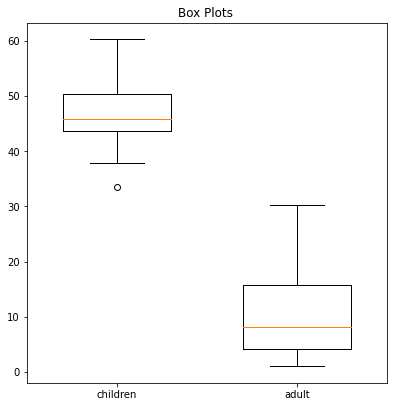

In [7]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1]) 
ax.boxplot([df_c['children'],df_a['adult']],widths=0.6)
plt.title("Box Plots ")
ax.set_xticklabels(['children','adult'])


In [8]:
c = sts.CompareMeans(sts.DescrStatsW(df_c), sts.DescrStatsW(df_a))
print('95 % confidence Intervel',c.tconfint_diff(usevar='unequal'))


95 % confidence Intervel (array([32.54875262]), array([40.71331634]))


On observing, The cereals amount is more in children compared to adults. It is observed a eay difference in the clildren and adults

### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [9]:
# your code here

df =  pd.read_csv('lab08-dataset.csv')
df

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
...,...,...,...,...,...,...,...
3393,The impact of personality traits on usersÕ inf...,Personality traits drive information seeking d...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3394,The impact of personality traits on usersÕ inf...,Eye-movement parameters can predict these patt...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3395,The impact of personality traits on usersÕ inf...,Prior domain knowledge improves older adultsÕ ...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3396,The impact of personality traits on usersÕ inf...,"Unlike prior results, older adults were outper...",IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0


In [10]:
df['Annotation1']=df['Annotation1'].str.strip() ## To remove\n
df['Annotation2']=df['Annotation2'].str.strip()
df['Annotation3']=df['Annotation3'].str.strip()

In [11]:
df

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal,Theory proposal,Theory proposal,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal,Algorithms/ Methods Construction or Optimization,Theory proposal,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal,Theory proposal,Theory proposal,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
...,...,...,...,...,...,...,...
3393,The impact of personality traits on usersÕ inf...,Personality traits drive information seeking d...,IPM,Theory proposal,Theory proposal,Theory proposal,2017.0
3394,The impact of personality traits on usersÕ inf...,Eye-movement parameters can predict these patt...,IPM,Theory proposal,Theory proposal,Theory proposal,2017.0
3395,The impact of personality traits on usersÕ inf...,Prior domain knowledge improves older adultsÕ ...,IPM,Theory proposal,Theory proposal,Theory proposal,2017.0
3396,The impact of personality traits on usersÕ inf...,"Unlike prior results, older adults were outper...",IPM,Theory proposal,Theory proposal,Theory proposal,2017.0


In [12]:
a=[]
for i in range(1,4):
  for j in df['Annotation'+str(i)].unique():
    if j not in a:
      a.append(j)
print(a)

label=dict()
k=1
for i in a:
  label[k]=i
  k+=1

for key in label:
  df.loc[df.Annotation1 == label[key], 'Annotation1_2'] = key
  df.loc[df.Annotation2 == label[key], 'Annotation2_2'] = key
  df.loc[df.Annotation3 == label[key], 'Annotation3_2'] = key


['Algorithms/ Methods Construction or Optimization', 'Theory proposal', 'Model Construction or Optimization', 'Resources', 'Performance Evaluation', 'Dataset creation', 'Applications', '"Theory proposal\n"']


In [13]:

oa=len(df[df['Annotation1_2']==df['Annotation2_2']])/len(df['Annotation1_2'])
print('Observed: ',oa)

# manualformula
ca=((len(df[df['Annotation1_2']==1])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==1])/len(df['Annotation2_2'])))\
+((len(df[df['Annotation1_2']==2])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==2])/len(df['Annotation2_2'])))\
+((len(df[df['Annotation1_2']==3])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==3])/len(df['Annotation2_2'])))\
+((len(df[df['Annotation1_2']==4])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==4])/len(df['Annotation2_2'])))\
+((len(df[df['Annotation1_2']==5])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==5])/len(df['Annotation2_2'])))\
+((len(df[df['Annotation1_2']==6])/len(df['Annotation1_2']))*(len(df[df['Annotation2_2']==6])/len(df['Annotation2_2'])))
print('Chance: ',ca)

Cohen_score=(oa-ca)/(1-ca)
print("Cohen's Kappa Score:",Cohen_score)

Observed:  0.5712183637433784
Chance:  0.2488316708821205
Cohen's Kappa Score: 0.42918035860197506


In [14]:
ks=[list(df['Annotation1_2'].values),list(df['Annotation2_2'].values),list(df['Annotation3_2'].values)]
score = krippendorff.alpha(ks) ## Kappa score calculation
print("Fleiss kappa score:", score)

Fleiss kappa score: 0.5123650300605436
